<a href="https://colab.research.google.com/github/oflodahub/MN_Prepa7/blob/main/MetodosNumericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos y su utilidad en la Industria

## ¿Qué son?
Los **métodos numéricos** son técnicas matemáticas que permiten resolver problemas cuando no existe una solución exacta mediante fórmulas. Proporcionan **aproximaciones precisas** usando cálculos repetitivos, generalmente con ayuda de computadoras.

Se usan cuando:
- Las ecuaciones son muy complejas  
- Se trabaja con datos reales  
- No hay solución analítica sencilla

## ¿Qué problemas resuelven?
- Raíces de ecuaciones  
- Sistemas de ecuaciones grandes  
- Derivadas e integrales aproximadas  
- Ecuaciones diferenciales (movimiento, calor, fluidos)  
- Ajuste de curvas a datos experimentales  

## Utilidad en la industria

**Ingeniería:** simulación de estructuras, vibraciones y diseño de piezas.  
**Manufactura:** optimización de procesos y control de calidad.  
**Automotriz y aeroespacial:** simulación de choques y aerodinámica.  
**Energía:** modelado de redes eléctricas y predicción de demanda.  
**Química y farmacéutica:** simulación de reacciones y diseño de fármacos.  
**Tecnología y datos:** inteligencia artificial y modelos financieros.

## Importancia
Permiten simular, predecir y optimizar sistemas reales, reduciendo costos, mejorando diseños y ayudando a tomar decisiones basadas en datos.

> **En resumen:** los métodos numéricos son herramientas esenciales para resolver problemas reales complejos mediante aproximaciones computacionales.


# Método de Simpson para Integración

## ¿Qué es?

El **método de Simpson** es un método numérico que se utiliza para **aproximar el valor de una integral definida**.  
Se basa en aproximar la función mediante **parábolas (Simpson 1/3)** o **poligonos de tercer grado (Simpson 3/8)** en lugar de rectángulos, lo que lo hace más preciso que otros métodos como el del trapecio.

---
# Simpson 1/3
## Idea principal

En lugar de unir puntos con rectas, el método de Simpson ajusta una **curva parabólica** que pasa por tres puntos consecutivos de la función, y calcula el área bajo esa curva.

---

## ¿Para qué se usa?

- Calcular áreas bajo curvas  
- Problemas de física (trabajo, energía, movimiento)  
- Ingeniería y simulaciones  
- Cuando la integral exacta es difícil o imposible de resolver analíticamente  

---

## Ventajas

- Mayor precisión que el método del trapecio  
- Bueno para funciones suaves  
- Fácil de programar en computadora  

---

## En resumen

> **El método de Simpson 1/3 es una técnica numérica que aproxima integrales usando parábolas, logrando resultados más precisos en el cálculo de áreas bajo una curva.**



In [ ]:
!python --version

Python 3.12.12


suma: 1.7641497537089883
integral =  1.7641497537089883


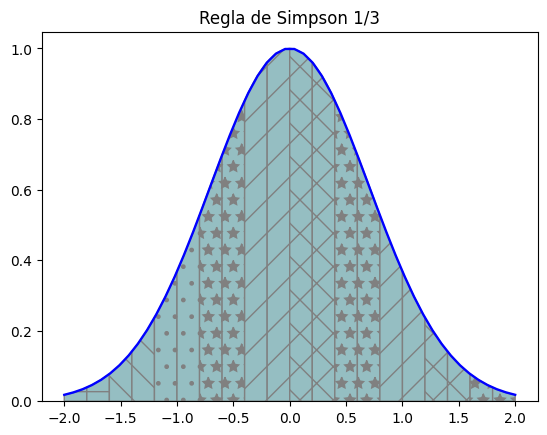

In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
'''
def regla_simpson13 (f,a,b,n):
    h = (b - a) / n
    xs=np. linspace (a,b,n +1)
    ys=f(xs)
    r=h*( ys [0]+4* sum (ys [1: n :2]) +2* sum (ys [2:n -1:2]) +ys[n]) /3
    return r
'''
def regla_simpson13 (f,a,b,n):
    h = (b - a) / n
    xs=np.linspace (a,b,n+1)
    #pasa toda la particion como argumento
    ys=f(xs)
    suma = 0
    for j in range(1, int(n/2)+1, 1):
        suma+= (ys[2*j-2] + 4*ys[2*j-1] + ys[2*j])
    suma = (h/3)*suma
    return suma

# funcion a integrar
def f(x):
     return np.exp(-(x**2))

def grafica_simpson (f,a,b,n):
    x = np.linspace (a, b)
    y= f(x)
    fig, ax = plt.subplots()
    ax.plot(x,y, 'b', linewidth=1.7)
    ax.set_ylim(bottom=0)

    h = (b-a) / n
    x0, x1, x2 = a, a + h, a + 2 * h
    i = 0
    patterns = ('-', '/', '\\', 'O', '.', 'o', '*', '\\', '/', '-', 'x', '+', '*', '\\', '/', '-', 'x', '+', '*', '\\', '/', '-', 'x', '+')
    for i in range(0, n, 2):
        xx = np.array([x0, x1, x2])
        yy = np.array([f(x0), f(x1), f(x2)])
        pol = lagrange(xx, yy)
        ix = np.linspace(x0, x1)
        iy = pol(ix)
        verts = [(x0, 0), *zip(ix, iy), (x1, 0)]
        poly = Polygon(verts, facecolor='#95BEC2', edgecolor='0.5', hatch = patterns[i])
        ax.add_patch(poly)
        ix = np.linspace(x1, x2)
        iy = pol(ix)
        verts = [(x1, 0), *zip(ix, iy), (x2, 0)]
        poly = Polygon(verts, facecolor='#95BEC2', edgecolor='0.5', hatch = patterns[i])
        ax.add_patch(poly)
        x0, x1, x2=x2, x2+h, x2+2*h
    plt.title('Regla de Simpson 1/3')
    # fig . savefig (" int_simpson13C . pdf ", bbox_inches = ' tight ')
    return plt

def main ():
    a = -2  # limite inferior
    b = 2  # limite superior
    n = 20  # numero de subintervalos DEBE SER MULTIPLO DE 2
    area = regla_simpson13(f, a, b, n)
    print('integral = ', area)

    g = grafica_simpson(f, a, b, n)
    g.show()

if __name__ == "__main__": main()
